# Exploratory Data Analysis (EDA) on GDP and Life Expectancy
## Introduction:
### Understanding the relationship between economic growth and public health is a fundamental topic in data science. This project explores the connection between GDP and Life Expectancy across six nations over time. Using Python and essential data science libraries, we analyze how life expectancy has evolved, whether economic growth translates to better health, and what insights can be drawn from the data.

*This project demonstrates key Exploratory Data Analysis (EDA) techniques, making it a valuable addition to my data science portfolio.*

## 1.- Import libraries and Descriptive statistics for EDA

In [103]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
# Descriptive Statistics:
gdp_data = pd.read_csv('all_data.csv')
print(gdp_data.head())
print(gdp_data.info())
print(gdp_data.describe())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
co

We can see that the average life exectancy in years of this dataset is 72, while the average GDP is $3,880 millions approximately 

## 2.-Trend Analysis

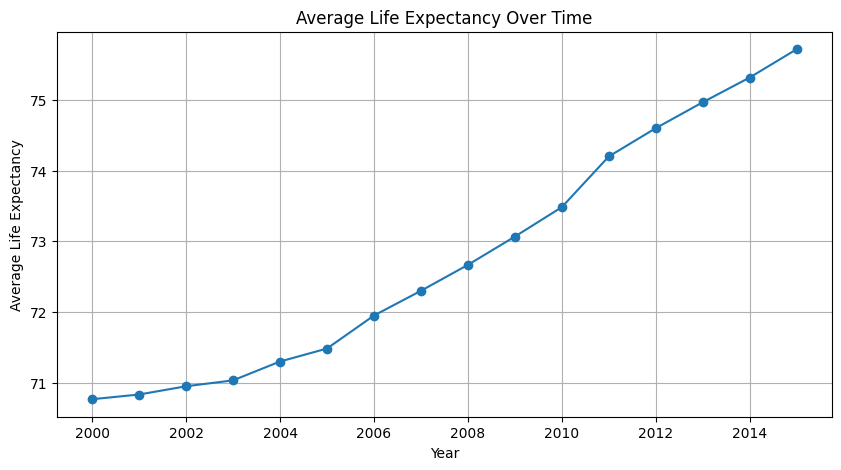

<Figure size 640x480 with 0 Axes>

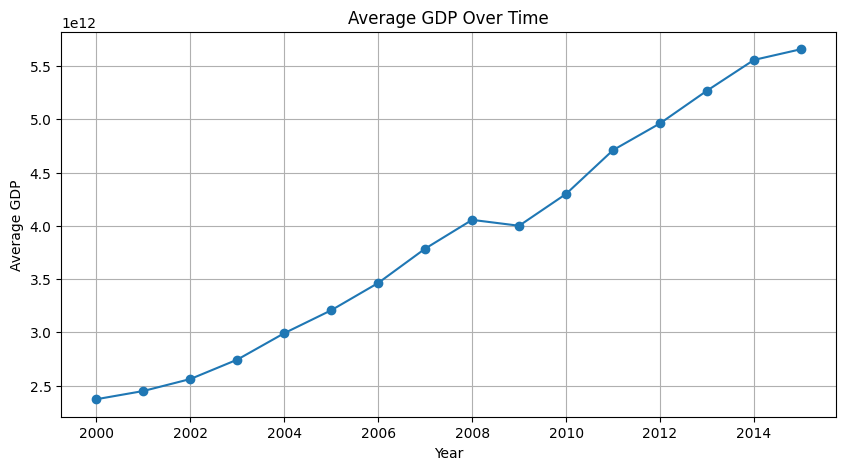

<Figure size 640x480 with 0 Axes>

In [100]:
# Trend Analysis:
# # Has life expectancy increased over time?:
#Rename Life expectancy at birth (years) column to "Expectancy"
gdp_renamed = gdp_data.rename(columns={'Life expectancy at birth (years)':'Expectancy'})
#Group expectancy mean by years:
yearly_expectancy = gdp_renamed.groupby('Year').Expectancy.mean()
#Plots life ecpectancy over the years:
plt.figure(figsize = (10, 5))
yearly_expectancy.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy Over Time')
plt.grid(True)
plt.show()
plt.clf()
# # Has GDP increased over time?:
#Group Average GDP by years: 
yearly_GDP = gdp_renamed.groupby('Year').GDP.mean()
#Plot results:
plt.figure(figsize = (10, 5))
yearly_GDP.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.title('Average GDP Over Time')
plt.grid(True)
plt.show()
plt.clf()

By looking at these plots we can conclude that both GDP and Life expectancy has increased over the years, but. Does it mean these two metrics are correlated?

# Correlation Analysis

Pearson´s Correlation between GDP and life expectancy is: 0.343206748449156 indicating a weak positive linear association


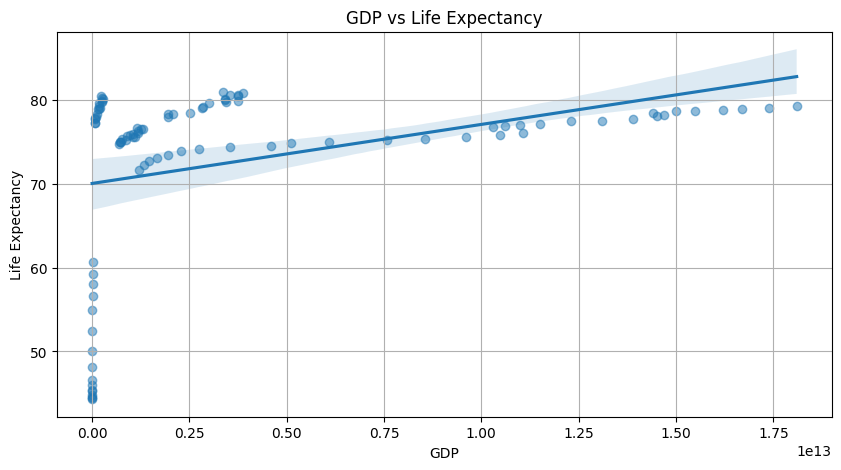

<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

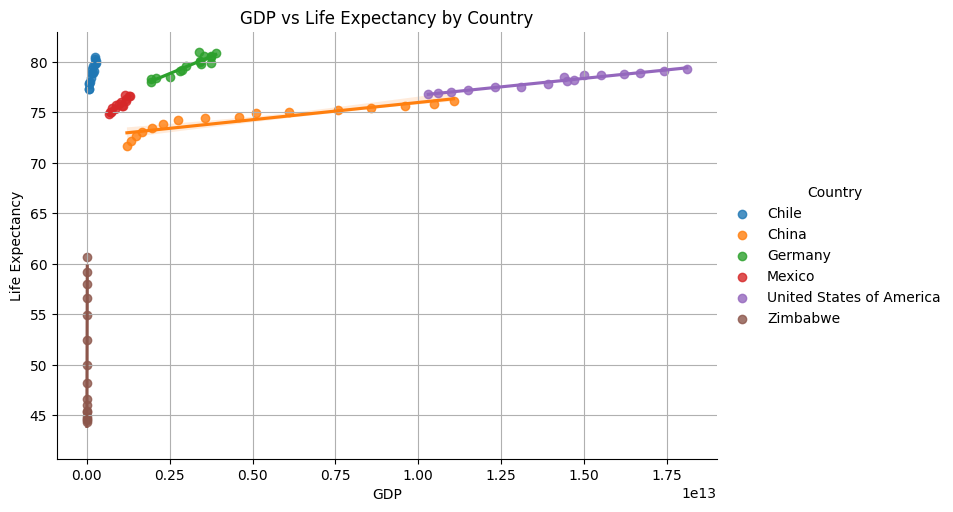

<Figure size 640x480 with 0 Axes>

In [107]:
# # Is there a correlation between GDP and life expectancy?
corr_GDP_Expectancy, p =pearsonr(gdp_renamed.GDP, gdp_renamed.Expectancy)
print ('Pearson´s Correlation between GDP and life expectancy is: ' + str(corr_GDP_Expectancy) + ' indicating a weak positive linear association')
#Plot of GDP vs Life Expectancy:
plt.figure( figsize =(10,5))
sns.regplot(x = 'GDP', y = 'Expectancy', data = gdp_renamed, scatter_kws={'alpha' : 0.5})
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('GDP vs Life Expectancy')
plt.grid(True)
plt.show()
plt.clf()
# # Correlation by country
plt.figure(figsize=(12,6))
sns.lmplot(x='GDP', y='Expectancy', data=gdp_renamed, hue='Country', aspect=1.5)
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('GDP vs Life Expectancy by Country')
plt.grid(True)
plt.show()
plt.clf()



Conducting a Pearson's Correlation calculation we conclude that GDP and life Expectancy has a weak linear association.

*This means that a growing GDP could also lead to an increment on life expectancy in a country, but we also have to take into considaration other key insights such as public health, technology and life style.*

In the second graph we could see that countries like China and the United States had the highest GDP growth. although life expectancy did not vary that much.
However, Zimbabwe's GDP had almost no variation and it was still the country with the highest growth in life expectancy.

*This could be because in more developed countries, life expectancy is already quite high. while in Zimbabwe we start from a very low figure and at its maximum only reaches 60 years old.*

# Distribution Analysis

C:\Users\adria\AppData\Local\Temp\ipykernel_20104\2875622977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(expectancy_by_country, palette= 'Accent')


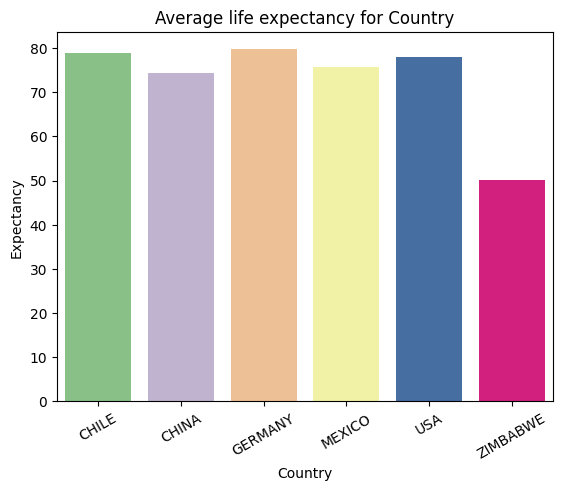

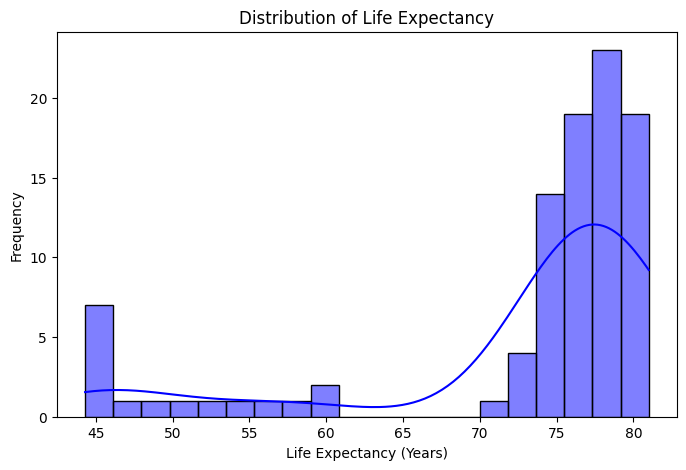

In [110]:
# #Average Expectancy for country:
expectancy_by_country = gdp_renamed.groupby('Country').Expectancy.mean()
sns.barplot(expectancy_by_country, palette= 'Accent')
ax = plt.subplot()
ax.set_xticks(range(len(gdp_renamed.groupby('Country'))))
ax.set_xticklabels(['CHILE', 'CHINA', 'GERMANY', 'MEXICO', 'USA', 'ZIMBABWE'], rotation = 30)
plt.title('Average life expectancy for Country')
# #Plot histogram to check if  life expectancy is normally distributed or skewed:
plt.figure(figsize=(8,5))
sns.histplot(gdp_renamed['Expectancy'], bins=20, kde=True, color="blue")
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.show()


As can be seen in both graphs, once again we can see that Zimbabwe is an outlier, since both its GDP and life expectancy are much lower than other countries. In previous points we verified that the distribution of the data is not normal.

# Conclusion
### Through this exploratory data analysis, key insights have been identified regarding the relationship between GDP and life expectancy across six nations.

## Data distribution:
- The distribution of life expectancy is not normal, suggesting the presence of external factors that disproportionately affect certain countries.
- Zimbabwe has significantly lower GDP and life expectancy compared to the other nations, which impacts the overall distribution of the data.
## Correlation Analysis:

- The Pearson correlation coefficient between GDP and life expectancy is 0.3432, indicating a weak positive linear association.
- This suggests that while higher GDP tends to be associated with higher life expectancy, the relationship is not strong enough to conclude direct causation.
## Final Thoughts:

- While economic growth appears to be linked to longer life expectancy, other factors such as healthcare quality, public policies, and socioeconomic conditions likely play a crucial role.
- For a deeper analysis, it would be interesting to include additional variables such as access to healthcare, education levels, or public health investments.

